Importation des packages

In [1]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from ACP_function import ACP


Importations des datas

In [2]:
df = pd.read_excel('genus.xlsx')


Séparation des variables observables et latentes

In [3]:
latentes = df.iloc[::,:27]
observables = df.iloc[::,27:-1].drop(['forest','geology'],axis = 1)
surfaces = df.iloc[::,-1]

latentes = latentes.div(surfaces,axis = 0)

geology = df['geology']

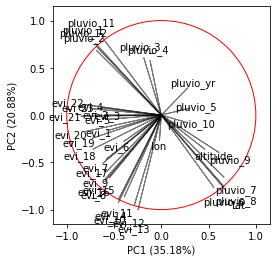

In [4]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(observables)

pca = PCA()
pca.fit(scaled_df)

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Get the percentage of variance explained by each principal component
variance_explained = pca.explained_variance_ratio_

plt.xlabel('PC1 ({}%)'.format(round(variance_explained[0]*100, 2)))
plt.ylabel('PC2 ({}%)'.format(round(variance_explained[1]*100, 2)))

max_norm = np.max(np.abs(np.concatenate([pca.components_[0,:], pca.components_[1,:]])))

for i, (x, y) in enumerate(zip(pca.components_[0,:], pca.components_[1,:])):
    plt.arrow(0, 0, x/max_norm, y/max_norm, color='k', alpha=0.5)
    plt.text((x/max_norm) * 1.2, (y/max_norm) * 1.2, observables.columns[i], color='k', ha='center', va='center')

# Add a circle of radius one
circle = plt.Circle((0, 0), 1, color='r', fill=False)
plt.gca().add_artist(circle)

#X and y have the same scale
plt.gca().set_aspect('equal', adjustable='box')

#limite de x et y 
plt.xlim(-1.15, 1.15)
plt.ylim(-1.15, 1.15)

plt.show()

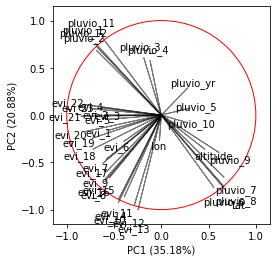

In [5]:
ACP(observables)

The ACP below justify that we can use a model with two blocks.



In [10]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(observables)

pca = PCA()
a = pca.fit(scaled_df).components_[0]

print(a)

[ 0.13012786  0.07932977 -0.19665232 -0.19360569 -0.05232075 -0.0335803
  0.08578482  0.15743786  0.1877812   0.18746659  0.17274696  0.07456991
 -0.17517415 -0.1953281  -0.15638927 -0.1645596  -0.13405568 -0.17700426
 -0.15943799 -0.11178852 -0.16475122 -0.16948894 -0.16313455 -0.12860647
 -0.11104439 -0.08036756 -0.06961375 -0.12731688 -0.15545452 -0.16814802
 -0.17482878 -0.20429329 -0.20690026 -0.2258572  -0.2402645  -0.23304168
 -0.20982042 -0.00558968  0.1941288 ]
